## import the libraries

# Sohaib Nasir
# 2021609
# Different Models Implementation on Knife vs Gun Dataset

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.8 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.7 MB/s eta 0:00:009.4 MB/s eta 0:00:01
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_

In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## load data

In [74]:
image_pistol = "/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Handgun"
image_knife = "/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Knife"
image_aurifle = "/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Automatic_Rifle"
image_bazooka ="/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Bazooka"
image_grlauncher="/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Grenade_Launcher"
image_shotgun="/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Shotgun"
image_smg="/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/SMG"
image_sniper="/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Sniper"
image_sword="/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Sword"


image_list = []
count = 0

for filename in os.listdir(image_pistol):
    if count == 56:
        break
    try:
        img = cv.imread(f"/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Handgun/{filename}")
        img_resized = cv.resize(img, (150, 150))
        img_array = np.array(img_resized)
        image_list.append(img_array)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_knife):
    if count == 58:
        break
    try:
        img2 = cv.imread(f"home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Knife/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')


for image in os.listdir(image_aurifle):
    if count == 56:
        break
    try:
        img3 = cv.imread(f"/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Automatic_Rifle/{image}")
        img3 = cv.resize(img3, (150, 150))
        img_array3 = np.array(img3)
        image_list.append(img_array3)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

        
for image in os.listdir(image_bazooka):
    if count == 54:
        break
    try:
        img4 = cv.imread(f"/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Bazooka/{image}")
        img4 = cv.resize(img4, (150, 150))
        img_array4 = np.array(img4)
        image_list.append(img_array4)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

        
for image in os.listdir(image_grlauncher):
    if count == 70:
        break
    try:
        img5 = cv.imread(f"/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Grenade_Launcher/{image}")
        img5 = cv.resize(img5, (150, 150))
        img_array5 = np.array(img5)
        image_list.append(img_array5)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

        
for image in os.listdir(image_shotgun):
    if count == 62:
        break
    try:
        img6 = cv.imread(f"//home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Shotgun/{image}")
        img6 = cv.resize(img6, (150, 150))
        img_array6 = np.array(img6)
        image_list.append(img_array6)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

        
for image in os.listdir(image_smg):
    if count == 70:
        break
    try:
        img7 = cv.imread(f"/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/SMG/{image}")
        img7 = cv.resize(img7, (150, 150))
        img_array7 = np.array(img7)
        image_list.append(img_array7)
        count += 1
    except Exception as e:
        print(f'Error: {e}')
        
for image in os.listdir(image_sniper):
    if count == 70:
        break
    try:
        img8 = cv.imread(f"/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Sniper/{image}")
        img8 = cv.resize(img8, (150, 150))
        img_array8 = np.array(img8)
        image_list.append(img_array8)
        count += 1
    except Exception as e:
        print(f'Error: {e}')        

for image in os.listdir(image_sword):
    if count == 71:
        break
    try:
        img9 = cv.imread(f"/home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Sword/{image}")
        img9 = cv.resize(img9, (150, 150))
        img_array9 = np.array(img9)
        image_list.append(img_array9)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

[ WARN:0@3107.128] global loadsave.cpp:248 findDecoder imread_('home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Knife/Knife_46.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@3107.137] global loadsave.cpp:248 findDecoder imread_('home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Knife/Knife_33.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@3107.137] global loadsave.cpp:248 findDecoder imread_('home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Knife/Knife_39.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@3107.137] global loadsave.cpp:248 findDecoder imread_('home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detection/Classification/Knife/Knife_45.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@3107.137] global loadsave.cpp:248 findDecoder imread_('home/pc17/Desktop/lab_2021609/Lab 9/archive(2) (1)/weapon_detect

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/i

In [75]:
len(image_pistol)

91

In [76]:
len(image_knife)

89

In [77]:
len(image_list)

453

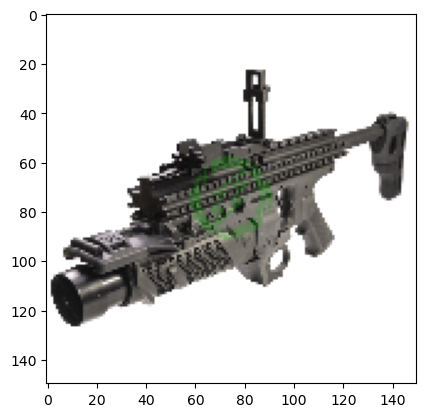

In [78]:
plt.imshow(image_list[166][:,:,::-1])

## create labels

In [79]:
label_list = []
for i in range(56):
    label_list.append([1,0,0,0,0,0,0,0,0])
for j in range(58):
    label_list.append([0,1,0,0,0,0,0,0,0])
for j in range(56):
    label_list.append([0,0,1,0,0,0,0,0,0])
for i in range(54):
    label_list.append([0,0,0,1,0,0,0,0,0])
for j in range(70):
    label_list.append([0,0,0,0,1,0,0,0,0])
for j in range(62):
    label_list.append([0,0,0,0,0,1,0,0,0])
for i in range(70):
    label_list.append([0,0,0,0,0,0,1,0,0])
for j in range(70):
    label_list.append([0,0,0,0,0,0,0,1,0])
for j in range(71):
    label_list.append([0,0,0,0,0,0,0,0,1])


In [80]:
label_list[166]

[0, 0, 1, 0, 0, 0, 0, 0, 0]

## rajdomize labels and images

In [81]:
combined = list(zip(label_list, image_list))
random.shuffle(combined)
shuffled_labels, shuffled_images = zip(*combined)

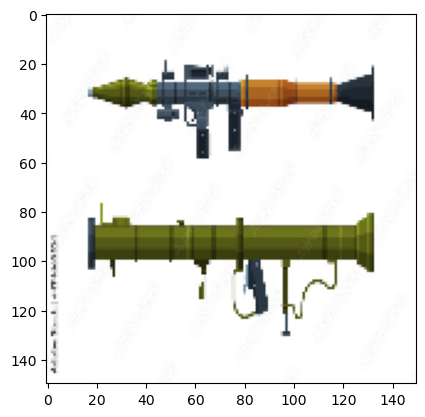

In [82]:
plt.imshow(shuffled_images[300][:,:,::-1])

In [83]:
shuffled_labels[300]

[0, 1, 0, 0, 0, 0, 0, 0, 0]

In [84]:
image_array = np.array(shuffled_images) 
labels_array = np.array(shuffled_labels)

## split data for test and validation

In [85]:
x_train, x_test, y_train, y_test = train_test_split(image_array, labels_array, test_size=0.2)

In [86]:
x_train1, x_validation, y_train1, y_validation = train_test_split(x_train, y_train, test_size=0.15)

In [87]:
from keras.utils import to_categorical

y_train1 = to_categorical(y_train1)

In [88]:
from PIL import Image

x_train1_resized = []
for img in x_train1:
    img = Image.fromarray(img)
    img = img.resize((150, 150))
    x_train1_resized.append(np.array(img))
x_train1 = np.array(x_train1_resized)

## augmentation data model

In [89]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2)
])

## callback

In [90]:
callback = keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')

## CNN model

In [91]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(9, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=output)

In [92]:
model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │        57,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,036,105 (3.95 MB)

 Trainable params: 1,036,105 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [94]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.1116 - loss: 2.3617 - val_accuracy: 0.1273 - val_loss: 2.1056
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.1641 - loss: 2.0907 - val_accuracy: 0.1273 - val_loss: 2.0718
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.1723 - loss: 2.0758 - val_accuracy: 0.1818 - val_loss: 2.0658
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.1601 - loss: 2.0910 - val_accuracy: 0.1273 - val_loss: 2.0796
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.1800 - loss: 2.0733 - val_accuracy: 0.1818 - val_loss: 2.0619
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.1364 - loss: 2.0539 - val_accuracy: 0.1818 - val_loss: 2.0688
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.1811 - loss: 2.0519 - val_accuracy: 0.1273 - val_loss: 2.0582
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.1544 - loss: 2.0495 - val_accuracy: 0.

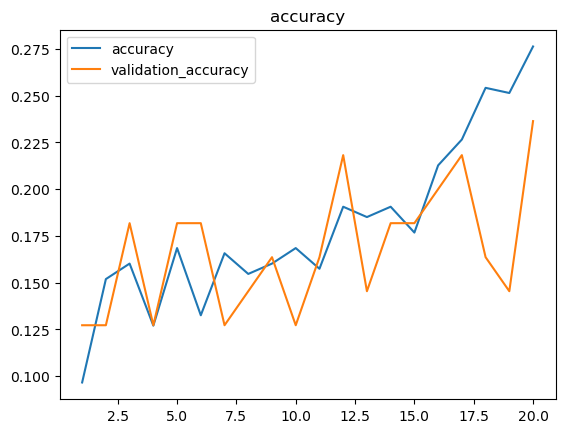

In [95]:
my_dict = history.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

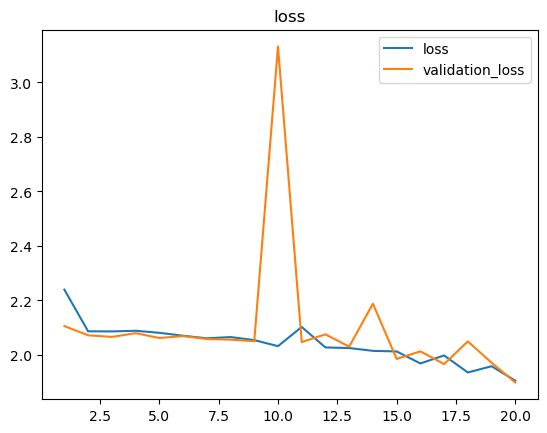

In [96]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

In [97]:
model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2624 - loss: 1.8837


[1.8775187730789185, 0.2747252881526947]

In [98]:
y_pred = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


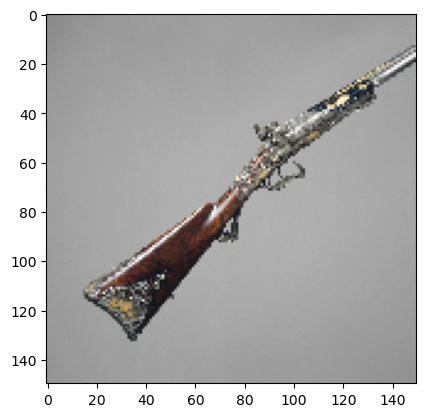

In [99]:
plt.imshow(x_test[90][:,:,::-1])

In [122]:
y_test[90]

array([0, 0, 0, 1, 0, 0, 0, 0, 0])

In [123]:
xception_bace = keras.applications.vgg16.VGG16(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(9, activation='softmax')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

In [124]:
for layer in xception_bace.layers:
  layer.trainable = False

In [125]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [126]:
history2 = model2.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 614ms/step - accuracy: 0.0920 - loss: 18.7492 - val_accuracy: 0.0909 - val_loss: 14.8178
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 702ms/step - accuracy: 0.1371 - loss: 11.6345 - val_accuracy: 0.1273 - val_loss: 11.3328
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 716ms/step - accuracy: 0.2069 - loss: 8.8866 - val_accuracy: 0.2364 - val_loss: 8.1627
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 733ms/step - accuracy: 0.3186 - loss: 6.7265 - val_accuracy: 0.2727 - val_loss: 6.1675
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 720ms/step - accuracy: 0.4185 - loss: 4.9532 - val_accuracy: 0.3636 - val_loss: 4.7069
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 725ms/step - accuracy: 0.4847 - loss: 3.9082 - val_accuracy: 0.5091 - val_loss: 3.6983
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 732ms/step - accuracy: 0.5747 - loss: 2.8109 - val_accuracy: 0.5818 - val_loss: 3.0269
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 719ms/step - accuracy: 0.6116 - loss: 2.2344 - val_accuracy

In [127]:
model2.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,728,541 (56.18 MB)

 Trainable params: 4,617 (18.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 9,236 (36.08 KB)

In [128]:
model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2624 - loss: 1.8837


[1.8775187730789185, 0.2747252881526947]

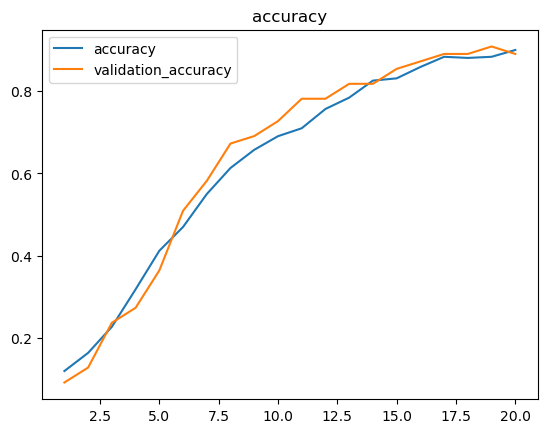

In [129]:
my_dict = history2.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

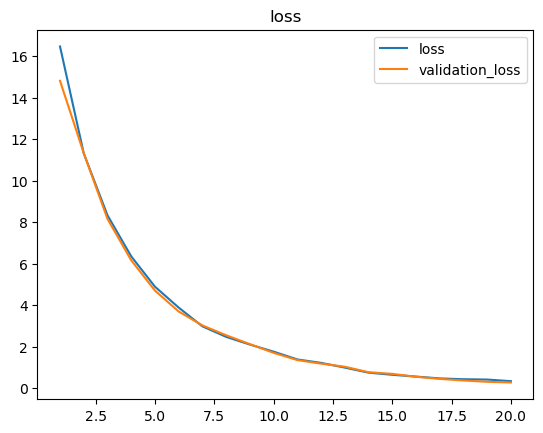

In [130]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# ResNet50

In [139]:
resnet50 = keras.applications.ResNet50(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(resnet50.output)
output = keras.layers.Dense(9, activation='softmax')(x)
model3 = keras.Model(inputs=resnet50.input, outputs=output)

In [140]:
for layer in xception_bace.layers:
  layer.trainable = False

In [141]:
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [142]:
history3 = model3.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=5)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2338 - loss: 2.6458 - val_accuracy: 0.1636 - val_loss: 37.4459
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4686 - loss: 1.6942 - val_accuracy: 0.1273 - val_loss: 2305.7759
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5853 - loss: 1.3055 - val_accuracy: 0.1273 - val_loss: 1733.9128
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7476 - loss: 0.8381 - val_accuracy: 0.1818 - val_loss: 7.0980
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8026 - loss: 0.6454 - val_accuracy: 0.2000 - val_loss: 7.4612


In [143]:
model3.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_21[0… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 70,712,221 (269.75 MB)

 Trainable params: 23,553,033 (89.85 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,106,068 (179.70 MB)

In [144]:
model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2624 - loss: 1.8837


[1.8775187730789185, 0.2747252881526947]

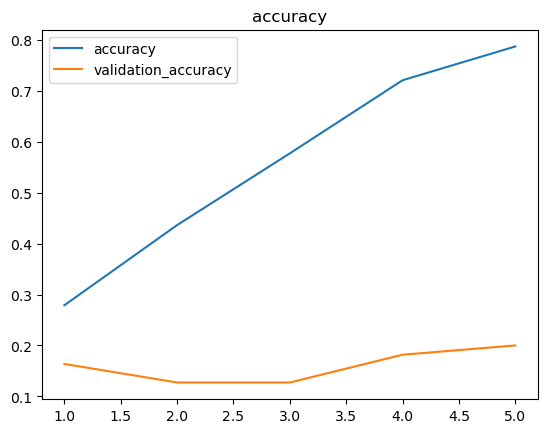

In [145]:
my_dict = history3.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

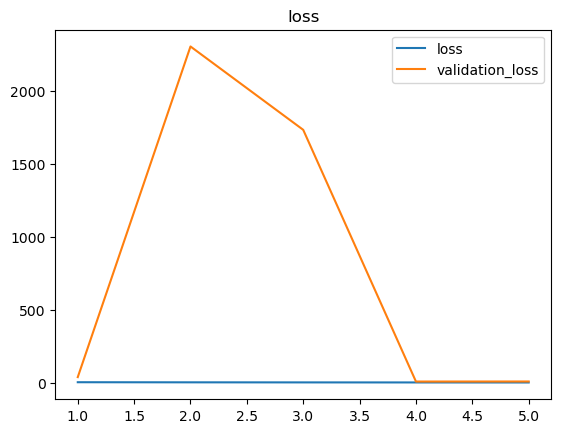

In [146]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# MobileNetV2

In [151]:
mobile_net = keras.applications.MobileNetV2(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(mobile_net.output)
output = keras.layers.Dense(9, activation='softmax')(x)
model4 = keras.Model(inputs=mobile_net.input, outputs=output)

In [152]:
for layer in xception_bace.layers:
  layer.trainable = False

In [153]:
model4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history4 = model4.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=5)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 963ms/step - accuracy: 0.2746 - loss: 2.2356 - val_accuracy: 0.2000 - val_loss: 6.2419
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 944ms/step - accuracy: 0.6783 - loss: 0.9417 - val_accuracy: 0.1636 - val_loss: 9.1997
Epoch 3/5
 8/12 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8328 - loss: 0.5705

In [50]:
model4.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, None,      │        864 │ input_layer_4[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, None,      │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, None,      │          0 │ bn_Conv1[0][0]    │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │          0 │ expanded_conv_de… │
│ (ReLU)              │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        512 │ expanded_conv_de… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, None,      │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, None,      │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, None,      │          0 │ block_1_expand_B… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, None,      │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, None,      │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │          0 │ block_1_depthwis… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, None,      │      2,304 │ block_1_depthwis

 Total params: 6,709,573 (25.59 MB)

 Trainable params: 2,225,153 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,450,308 (16.98 MB)

In [51]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7511 - loss: 0.4846 


[0.44435715675354004, 0.7422680258750916]

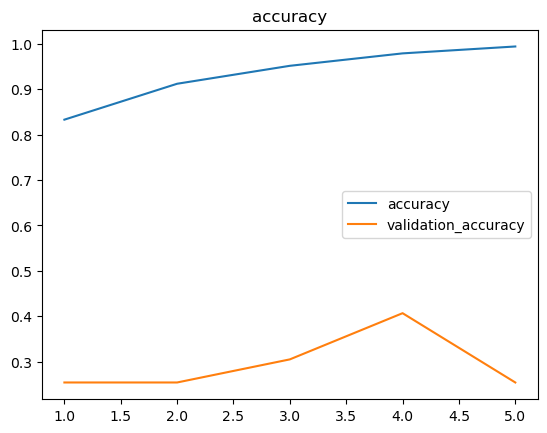

In [52]:
my_dict = history4.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

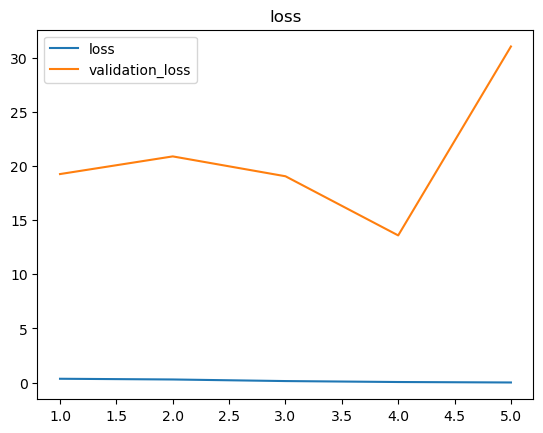

In [53]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# InceptionNet

In [56]:
inceptionnet = keras.applications.InceptionV3(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(inceptionnet.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model5 = keras.Model(inputs=inceptionnet.input, outputs=output)

In [57]:
for layer in xception_bace.layers:
  layer.trainable = False

In [58]:
model5.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [59]:
history5 = model5.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=5)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8149 - loss: 0.4953 - val_accuracy: 0.7627 - val_loss: 83.8541
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9111 - loss: 0.2163 - val_accuracy: 0.7627 - val_loss: 18497.4492
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9532 - loss: 0.1265 - val_accuracy: 0.7627 - val_loss: 3465.6721
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9968 - loss: 0.0256 - val_accuracy: 0.7458 - val_loss: 76.7658
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9929 - loss: 0.0213 - val_accuracy: 0.7797 - val_loss: 6.2662


In [60]:
model5.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, None,      │        864 │ input_layer_6[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, None,      │      9,216 │ activation_94[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, None,      │     18,432 │ activation_95[0]… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, None,      │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, None,      │      5,120 │ max_pooling2d_8[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, None,      │    138,240 │ activation_97[0]… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, None,      │          0 │ batch_normalizat

 Total params: 65,345,637 (249.27 MB)

 Trainable params: 21,770,401 (83.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 43,540,804 (166.09 MB)

In [61]:
model5.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.6825 - loss: 9.9181 


[8.26693058013916, 0.6907216310501099]

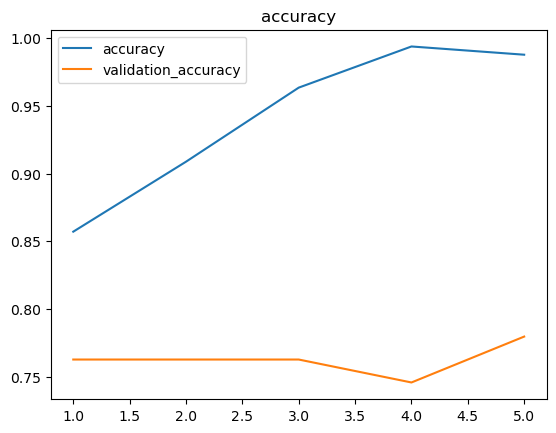

In [62]:
my_dict = history5.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

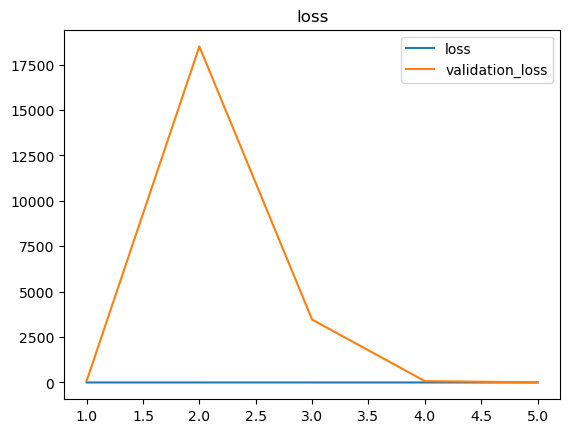

In [63]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# Conclusion:
## MobileNetV2:
MobileNets are a family of efficient convolutional neural networks designed for mobile and edge devices.
MobileNetV2 has 53 layers, including the input layer and the output layer. It is a lightweight CNN architecture that is designed for mobile and embedded vision applications. It uses depthwise separable convolutions to reduce the number of parameters and computations required by the model.
## Xception:
Xception, introduced by Google in 2017, is a deep convolutional neural network known for its novel feature learning. It uses depth-separable convolutions, which decompose standard convolutions into depth and pointwise convolutions.
Xception has 36 layers, including the input layer and the output layer. It is a CNN architecture that is based on the Inception architecture, but replaces the standard Inception modules with depthwise separable convolutions. This allows the model to achieve better performance with fewer parameters.
## GoogLeNet (InceptionV1):
GoogLeNet has 22 layers, including the input layer and the output layer. It is a CNN architecture that was introduced in 2014 and is composed of multiple "inception modules" that apply multiple convolutional filters of different sizes to the input, allowing the model to learn features at multiple scales.
## VGG16: 
VGGNet was born out of the need to reduce the # of parameters in the CONV layers and improve on training time.
VGG16 has 16 layers, including the input layer and the output layer. It is a CNN architecture that was introduced in 2014 and is composed of multiple convolutional layers with small (3x3) filters. It is a deep and powerful model that has been widely used for image classification tasks.
## ResNet50: 
 provided a novel way to add more convolutional layers to a CNN, without running into the vanishing gradient problem, using the concept of shortcut connections.
ResNet50 has 50 layers, including the input layer and the output layer. It is a CNN architecture that was introduced in 2015 and is composed of multiple residual blocks that allow the model to learn deeper representations by adding "shortcut connections" that bypass some of the layers. ResNet50 is a powerful model that has been widely used for image classification tasks.

## Accuracies:
VGG16 we see that highest accuracy of 26 percent.